INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de détection de la peau par la méthode Bayésienne.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as fltr

Lecture d'images d'échantillons de peau et de non peau. Notez qu'il y a plus d'échantillons de peau que non peau. Non peau n'est pas très varié. 

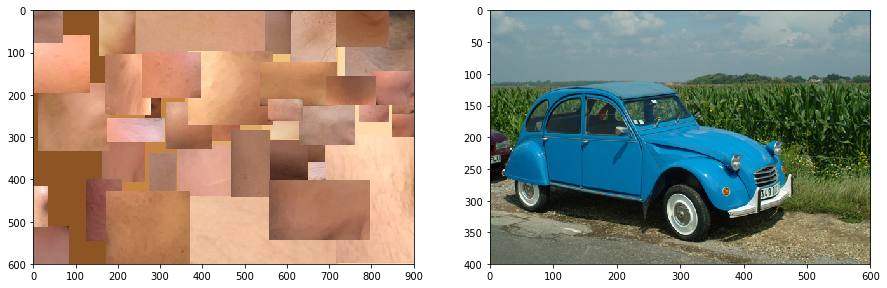

In [2]:
plt.figure(figsize = (15,20))
plt.subplot(121)
imagePeau = plt.imread('EchPeau.jpg')  
plt.imshow(imagePeau)
plt.subplot(122)
imageNonPeau = plt.imread('RGB.jpg')  
plt.imshow(imageNonPeau)
plt.show()

Calcul des histogrammes pour Peau et Non Peau. On utilise un histogramme de triplets RGB. 

In [3]:
Qu = 8.0   #Niveau de quantification des couleurs
HistoPeau = np.zeros((int(256.0/Qu),int(256.0/Qu),int(256.0/Qu)),dtype=np.float)
for i in range(0,len(imagePeau)):
    for j in range(0,len(imagePeau[0])):
        HistoPeau[int(imagePeau[i][j][0]/Qu)][int(imagePeau[i][j][1]/Qu)][int(imagePeau[i][j][2]/Qu)] += 1

In [4]:
HistoNonPeau = np.zeros((int(256.0/Qu),int(256.0/Qu),int(256.0/Qu)),dtype=np.float)
for i in range(0,len(imageNonPeau)):
    for j in range(0,len(imageNonPeau[0])):
        HistoNonPeau[int(imageNonPeau[i][j][0]/Qu)][int(imageNonPeau[i][j][1]/Qu)][int(imageNonPeau[i][j][2]/Qu)] += 1


Transformation des histogrammes en densité de probabilité. On divise par le nombre total de pixels.

In [5]:
HistoPeau = HistoPeau/(len(imagePeau)*len(imagePeau[0]))
HistoNonPeau = HistoNonPeau/(len(imageNonPeau)*len(imageNonPeau[0]))

Lecture de l'image sur laquelle nous allons appliquer la détection. 

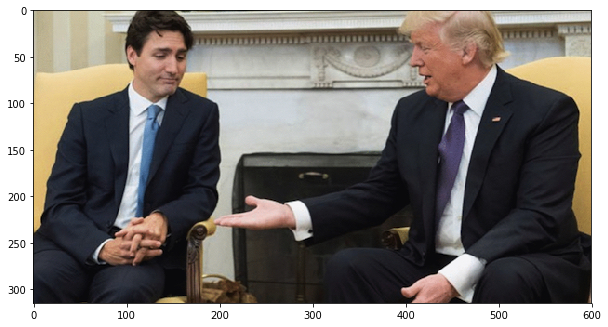

In [6]:
plt.figure(figsize = (10,10))
image = plt.imread('Trudeau.jpg')
plt.imshow(image)
plt.show()

In [7]:
PixPeau = np.zeros((len(image),len(image[0])))
for i in range(len(image)):
    for j in range(len(image[0])):
        #Vérifie si la probabilité du pixel est plus grande d'être de la peau que non peau. 
        if HistoPeau[int(image[i][j][0]/Qu)][int(image[i][j][1]/Qu)][int(image[i][j][2]/Qu)] > \
            HistoNonPeau[int(image[i][j][0]/Qu)][int(image[i][j][1]/Qu)][int(image[i][j][2]/Qu)]:
            PixPeau[i][j] = True;
        else:
            PixPeau[i][j] = False;        

Affichage du résultat. Les performances sont meilleures que pour DetectionPeau1.

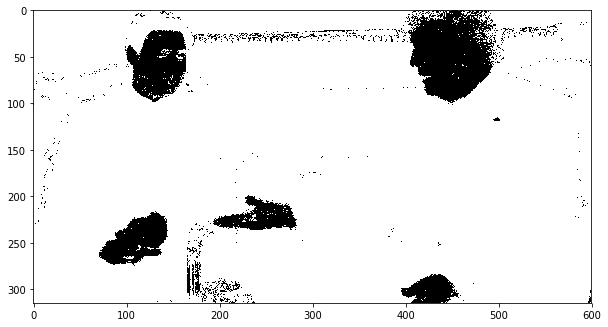

In [8]:
plt.figure(figsize = (10,10))
plt.imshow(PixPeau, plt.get_cmap('binary'))
plt.show()

Extra: On peut éliminer un peu de bruit en appliquant un filter médian.

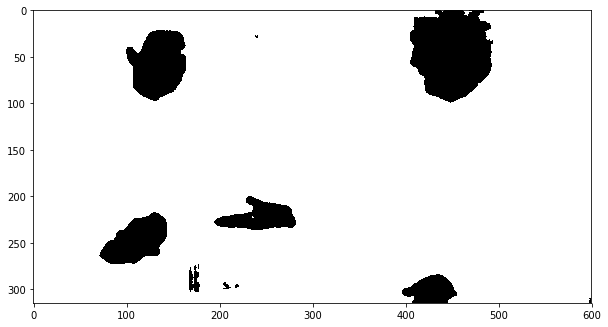

In [9]:
PixPeau = fltr.median_filter(PixPeau, size=(7, 7))
plt.figure(figsize = (10,10))
plt.imshow(PixPeau, plt.get_cmap('binary'))
plt.show()